Nota: La base de datos es simuladada y fue tomada de la siguiente dirección: https://www.kaggle.com/datasets/gregorut/videogamesales

# **1. Limpieza de Datos**

In [34]:
# @title
import pandas as pd

vgsales = pd.read_csv(r'C:\Users\fs_or\Documents\Data Science\Bases de datos\Videogames Sales\vgsales.csv')

print((vgsales.isna()).sum())
vgsales.shape

vgsales = vgsales.dropna()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [8]:
vgsales['Year'] = vgsales['Year'].astype(int)

In [9]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# **2. Tendencias de Ventas**

## Más vendidos por año de publicación:

In [10]:
# @title
#El rango temporal es entre 1980 y 2020
#vgsales['Year'].describe()

In [11]:
# @title
year = vgsales['Year']

best_per_year = []

for y in range(1980,2021):
  year_top = vgsales.loc[(year == y).idxmax(), ['Name', 'Year', 'Genre','Platform','Publisher']]
  best_per_year.append(year_top)

ind = range(1,len(best_per_year)+1)

best_per_year = pd.DataFrame(best_per_year)

best_per_year.set_index('Year')


,Name,Genre,Platform,Publisher
Year,,,,
1980,Asteroids,Shooter,2600,Atari
1981,Pitfall!,Platform,2600,Activision
1982,Pac-Man,Puzzle,2600,Atari
1983,Baseball,Sports,NES,Nintendo
1984,Duck Hunt,Shooter,NES,Nintendo
1985,Super Mario Bros.,Platform,NES,Nintendo
1986,The Legend of Zelda,Action,NES,Nintendo
1987,Zelda II: The Adventure of Link,Adventure,NES,Nintendo
1988,Super Mario Bros. 3,Platform,NES,Nintendo


# **3. Análisis por plataforma**

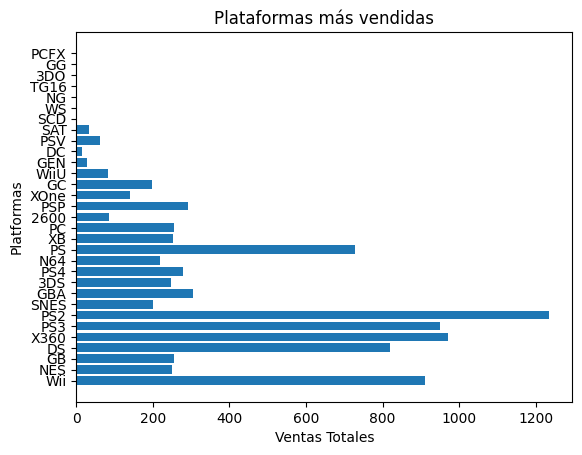

In [12]:
# @title
import matplotlib.pyplot as plt

x = []
l = []
for p in vgsales['Platform'].unique():
    x.append((vgsales.loc[vgsales['Platform'] == p,'Global_Sales']).sum())
    l.append(p)




plt.barh(l, x, align='center')
plt.ylabel('Platformas')
plt.xlabel('Ventas Totales')
plt.title('Plataformas más vendidas')
plt.show()


# Ventas de PS2, PS3 y Xbox360

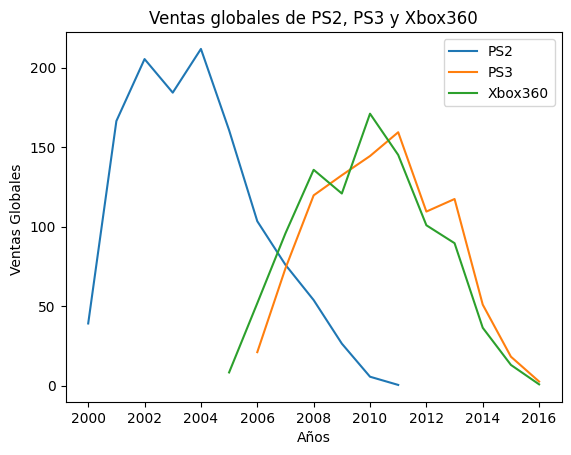

In [13]:
# @title
def get_platform(platform):
  temp = vgsales.loc[vgsales['Platform'] == platform, :]
  temp = temp.sort_values(by='Year')
  temp = temp.groupby('Year').sum('Global_Sales')
  return temp

ps2 = get_platform('PS2')
ps3 = get_platform('PS3')
x360 = get_platform('X360')

w = ps2.index
x = ps2['Global_Sales']
y = ps3.index
z = ps3['Global_Sales']
a = x360.index
b = x360['Global_Sales']

plt.plot(w,x, label='PS2')
plt.plot(y,z, label='PS3')
plt.plot(a,b, label='Xbox360')

plt.xlabel('Años')
plt.ylabel('Ventas Globales ')
plt.title('Ventas globales de PS2, PS3 y Xbox360')
plt.legend()
plt.show()


## Generos más vendidos por consola:

In [14]:
# @title
# El operador ""&"" tiene mayor precedencia que "==" !!!!!!!!!!!


def most_selled_genre(platform):
    genres = vgsales['Genre'].unique()
    temp = []
    for g in genres:
        temp.append(vgsales.loc[(vgsales['Platform'] == platform)&(vgsales['Genre'] == g), 'Global_Sales'].sum())
    res = [genres[temp.index(max(temp))], max(temp)]
    return res

plat_genre = [ ]
for p in vgsales['Platform'].unique():
    plat_genre.append(most_selled_genre(p))

plat_genre_sales = pd.DataFrame(plat_genre, index = vgsales['Platform'].unique(), columns=['Genre','Sales'])
plat_genre_sales = plat_genre_sales.sort_values(by='Sales',ascending=False)
plat_genre_sales



,Genre,Sales
PS3,Action,304.02
Wii,Sports,289.95
X360,Shooter,277.23
PS2,Action,272.43
DS,Misc,137.67
PS,Action,125.74
NES,Platform,95.78
GB,Role-Playing,88.24
PS4,Action,87.06
GBA,Platform,78.08


# **4.Análisis por género**

In [15]:
by_genre = vgsales.groupby('Genre')['Global_Sales'].sum()
by_genre = by_genre.sort_values(ascending=False)
by_genre

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64

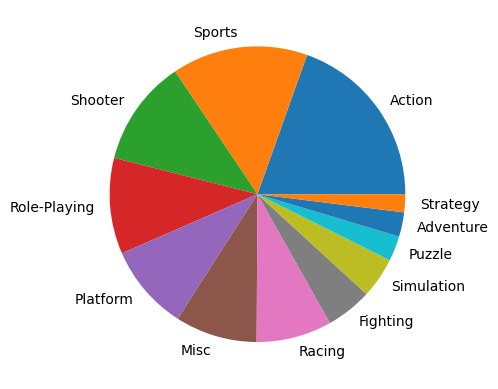

In [16]:
x = by_genre
l = by_genre.index
plt.pie(x,labels=l)
plt.show()

# **5.Análisis Regional**

## Top 5 Vendidos en Europa

In [17]:
def top5_region(region):
    temp = vgsales.sort_values(by= region, ascending=False, ignore_index=True)
    temp = temp.loc[:,['Name','Platform','Year','Genre','Publisher',region]]
    temp = temp[0:5]
    indice = range(1,6)
    temp.index = indice
    return temp

top5eu = top5_region('EU_Sales')
top5eu

,Name,Platform,Year,Genre,Publisher,EU_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,29.02
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,12.88
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,11.01
4,Nintendogs,DS,2005,Simulation,Nintendo,11.00
5,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,9.27


## Top 5 Vendidos en Japón

In [18]:
top5jp = top5_region('JP_Sales')
top5jp

,Name,Platform,Year,Genre,Publisher,JP_Sales
1,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,10.22
2,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,7.20
3,Super Mario Bros.,NES,1985,Platform,Nintendo,6.81
4,New Super Mario Bros.,DS,2006,Platform,Nintendo,6.50
5,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.04


## Top 5 Vendidos en Norteamérica

In [19]:
# @title
top5na = top5_region('NA_Sales')
top5na

,Name,Platform,Year,Genre,Publisher,NA_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08
3,Duck Hunt,NES,1984,Shooter,Nintendo,26.93
4,Tetris,GB,1989,Puzzle,Nintendo,23.20
5,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85


## Títulos más vendidos por región

## Europa

In [20]:
def title_by_region(region):
    temp = vgsales.loc[vgsales[region].idxmax(),['Name','Platform','Year','Genre','Publisher']]
    return temp

title_by_region('EU_Sales')


Name         Wii Sports
Platform            Wii
Year               2006
Genre            Sports
Publisher      Nintendo
Name: 0, dtype: object

## Japón

In [21]:
title_by_region('JP_Sales')

Name         Pokemon Red/Pokemon Blue
Platform                           GB
Year                             1996
Genre                    Role-Playing
Publisher                    Nintendo
Name: 4, dtype: object

## Norteamérica

In [22]:
title_by_region('NA_Sales')

Name         Wii Sports
Platform            Wii
Year               2006
Genre            Sports
Publisher      Nintendo
Name: 0, dtype: object

## Géneros más vendidos por región

## Norteamérica

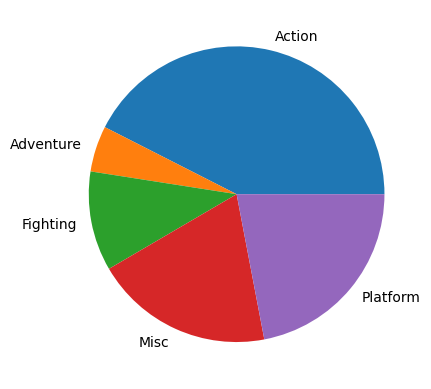

In [23]:
gen_by_reg = vgsales.groupby('Genre').sum()
gen_by_reg = gen_by_reg.loc[:,['NA_Sales','JP_Sales','EU_Sales']]
na = gen_by_reg['NA_Sales']
na.sort_values(ascending=False)
na = na[0:5]

plt.pie(na,labels=na.index)
plt.show()

## Japón

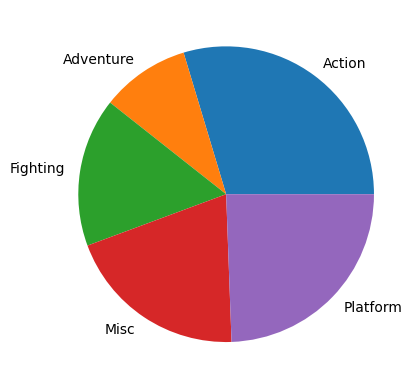

In [24]:
jp = gen_by_reg['JP_Sales']
jp.sort_values(ascending=False)
jp = jp[0:5]
plt.pie(jp,labels= jp.index)
plt.show()

## Europa

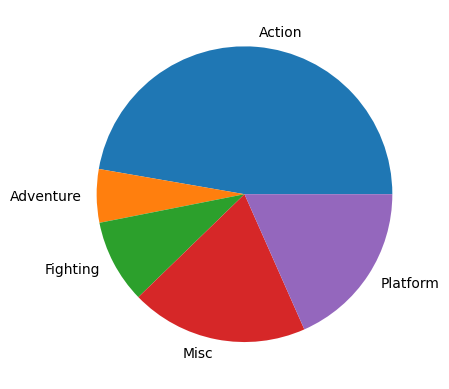

In [25]:
eu = gen_by_reg['EU_Sales']
eu.sort_values(ascending=False)
eu = eu[0:5]
plt.pie(eu,labels=eu.index)
plt.show()


# 6.Análisis por Empresa

## Empresas con mayores ventas

In [26]:
publisher_best = vgsales.groupby('Publisher')['Global_Sales'].sum().reset_index()
publisher_best = publisher_best.sort_values(by='Global_Sales',ascending=False, ignore_index=True)
publisher_best = publisher_best.rename(columns={'Publisher': 'Empresa', 'Global_Sales': 'Ventas Totales'})
publisher_best[0:5]


,Empresa,Ventas Totales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54


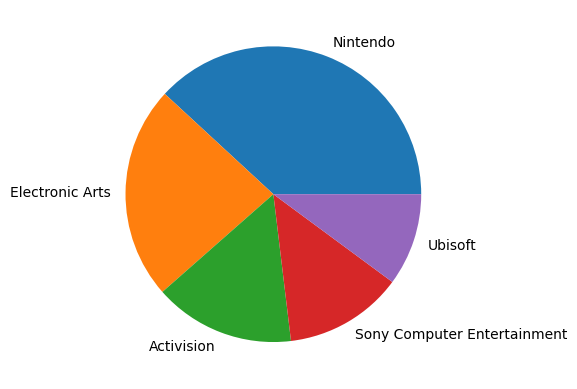

In [27]:
y = publisher_best['Ventas Totales'][0:5]
plt.pie(y, labels=publisher_best['Empresa'][0:5])
plt.show()

## Títulos más exitosos de cada empresa

### Nintendo

In [28]:
def best_by_company(publisher):
    temp = vgsales.loc[vgsales['Publisher'] == publisher,:]
    temp = temp.sort_values(by='Global_Sales', ascending=False)
    temp = temp.loc[temp.index[0],['Name','Platform','Genre','Publisher','Global_Sales']]
    return temp

best_by_company('Nintendo')

Name            Wii Sports
Platform               Wii
Genre               Sports
Publisher         Nintendo
Global_Sales         82.74
Name: 0, dtype: object

### Electronic Arts

In [29]:
best_by_company('Electronic Arts')

Name                    FIFA 16
Platform                    PS4
Genre                    Sports
Publisher       Electronic Arts
Global_Sales               8.49
Name: 77, dtype: object

### Activision

In [30]:
best_by_company('Activision')

Name            Call of Duty: Modern Warfare 3
Platform                                  X360
Genre                                  Shooter
Publisher                           Activision
Global_Sales                             14.76
Name: 29, dtype: object

### Sony

In [31]:
best_by_company('Sony Computer Entertainment')

Name                 Gran Turismo 3: A-Spec
Platform                                PS2
Genre                                Racing
Publisher       Sony Computer Entertainment
Global_Sales                          14.98
Name: 28, dtype: object

### Ubisoft

In [32]:
best_by_company('Ubisoft')

Name            Just Dance 3
Platform                 Wii
Genre                   Misc
Publisher            Ubisoft
Global_Sales           10.26
Name: 60, dtype: object